# Netflix Stock Price Prediction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
df = pd.read_csv('data/NFLX.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
#DF data Viz
viz = df.copy()
viz.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Data Preparation

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.shape

(1009, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


### Split the data into Train&Test set

In [13]:
train, test = train_test_split(df, test_size = 0.2)

In [14]:
test_pred = test.copy()

In [15]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
356,2019-07-08,378.190002,378.250000,375.359985,376.160004,376.160004,3113400
17,2018-03-01,292.750000,295.250000,283.829987,290.390015,290.390015,11932100
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
384,2019-08-15,299.500000,300.630005,288.000000,295.760010,295.760010,9629200
208,2018-11-30,288.000000,290.809998,283.059998,286.130005,286.130005,11860100
484,2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500
290,2019-04-02,366.250000,368.420013,362.220001,367.720001,367.720001,5158700
412,2019-09-25,255.710007,266.600006,253.699997,264.750000,264.750000,11643800
886,2021-08-12,511.859985,513.000000,507.200012,510.720001,510.720001,1685700
343,2019-06-18,355.570007,361.500000,353.750000,357.119995,357.119995,5428500


In [16]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
204,2018-11-26,260.549988,266.250000,253.800003,261.429993,261.429993,12498600
505,2020-02-07,365.040009,371.799988,363.570007,366.769989,366.769989,4385200
517,2020-02-26,366.309998,382.000000,365.000000,379.239990,379.239990,8934100
353,2019-07-02,374.890015,376.000000,370.309998,375.429993,375.429993,3625000
303,2019-04-22,359.700012,377.690002,359.000000,377.339996,377.339996,11980500
789,2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800
175,2018-10-15,337.630005,339.209991,326.929993,333.130005,333.130005,11215000
640,2020-08-20,484.690002,498.940002,483.890015,497.899994,497.899994,5132500
869,2021-07-20,526.070007,536.640015,520.299988,531.049988,531.049988,6930400
719,2020-12-11,495.000000,503.339996,494.850006,503.220001,503.220001,3210900


In [17]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [18]:
y_train = train['Close'].values
y_test = test['Close'].values

### Linear Regression

In [19]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model_lnr.predict(x_test)

In [21]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.5128373]


### Model Evaluation

In [23]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 13.746
RMSE 3.708
MAE 2.778
MAPE 0.007
R2 Score :  0.999


### Model Visualization

In [25]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [26]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [27]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


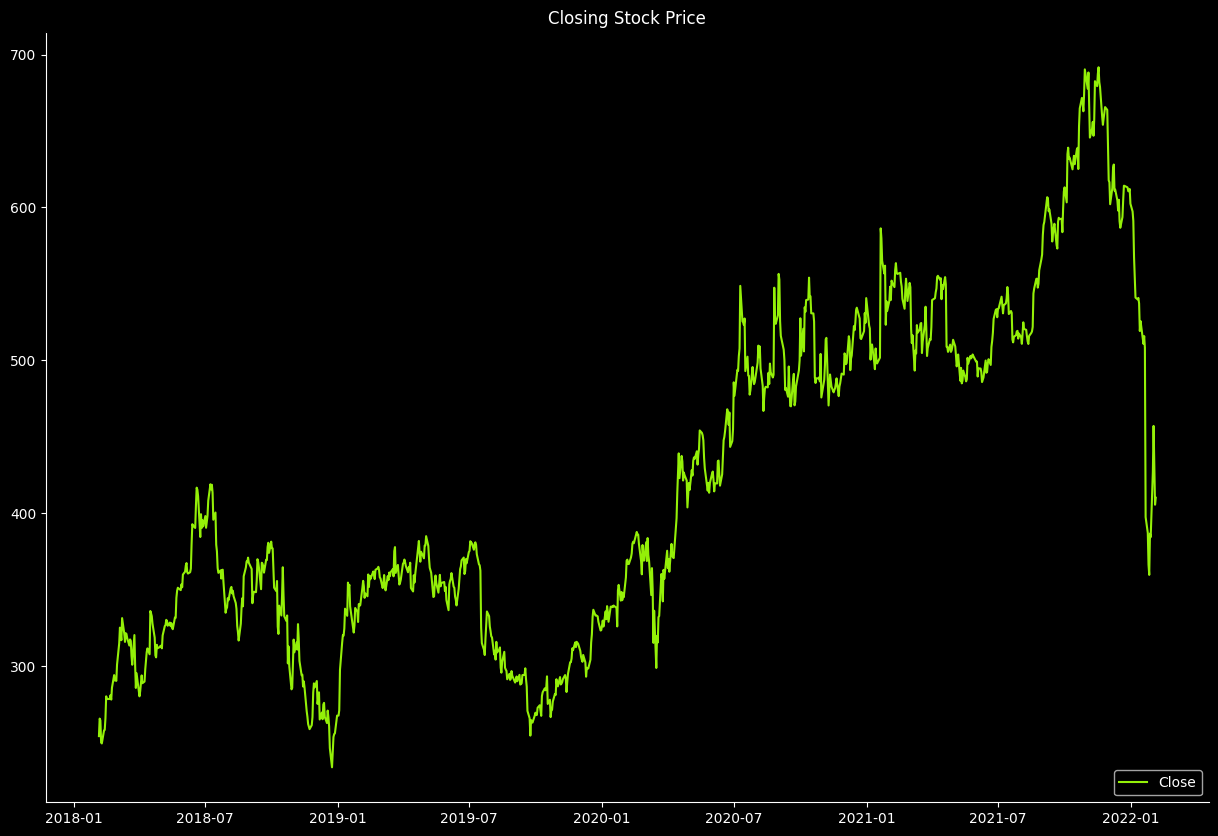

In [28]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

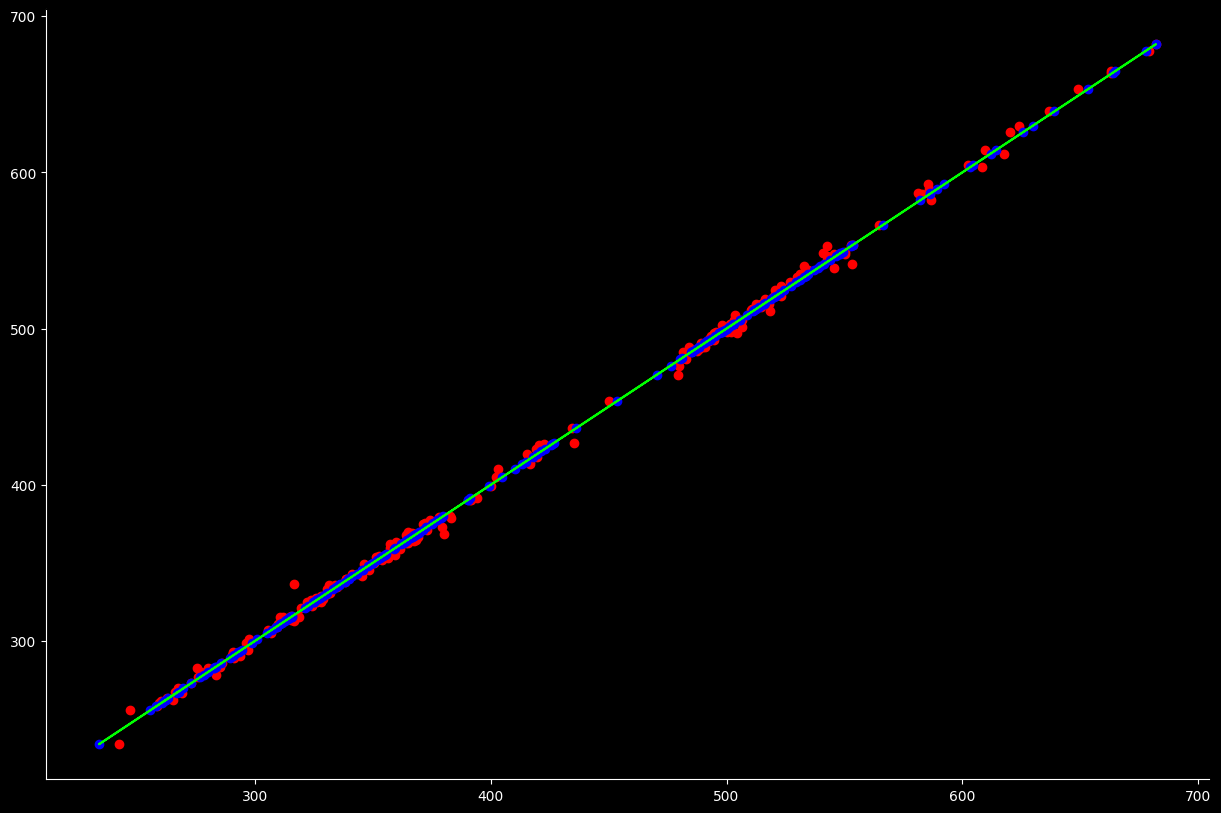

In [29]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [30]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
204,2018-11-26,260.549988,266.250000,253.800003,261.429993,261.429993,12498600,260.266926
505,2020-02-07,365.040009,371.799988,363.570007,366.769989,366.769989,4385200,369.288521
517,2020-02-26,366.309998,382.000000,365.000000,379.239990,379.239990,8934100,378.137088
353,2019-07-02,374.890015,376.000000,370.309998,375.429993,375.429993,3625000,372.050813
303,2019-04-22,359.700012,377.690002,359.000000,377.339996,377.339996,11980500,374.110145
...,...,...,...,...,...,...,...,...
328,2019-05-28,354.390015,361.200012,353.649994,355.059998,355.059998,4717100,359.304797
361,2019-07-15,372.940002,373.679993,362.299988,366.600006,366.600006,7944700,365.184656
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,258.697008
808,2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,503.584821


In [31]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,418.874207,108.787723,233.880005,328.070007,379.024994,507.972496,682.020020
Close_Prediction,202.0,418.441858,108.519345,242.480083,328.099028,381.373167,506.669983,681.987242


### Savingo the Data as CSV


In [35]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [36]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-13,258.269989,258.697008
2018-02-14,NaN,NaN
2018-02-15,280.269989,276.953455
2018-02-16,NaN,NaN
2018-02-17,NaN,NaN
...,...,...
2022-01-31,NaN,NaN
2022-02-01,NaN,NaN
2022-02-02,NaN,NaN


In [37]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
